In [1]:
# only adjust settings in this cell
state = 'MT'
root_name = 'Missoula' # which county will root our district (or county_cluster==multi-district)?
k = 2                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 1               # size=1 for single district, size=2 for double district, ...
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.json'

from cluster import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a multi-district (county cluster) of size =",G._size)

State has total of k = 2 districts
We seek a multi-district (county cluster) of size = 1


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 542112
Single district upper population limit U = 542113


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Missoula County to be the root. In our graph, this is vertex # 35


In [6]:
from cluster import enumerate_top_districts
districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=10 )

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 448 rows, 527 columns and 2227 nonzeros
Model fingerprint: 0xfe30c8c2
Variable types: 277 continuous, 250 integer (250 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+05]
Presolve removed 67 rows and 65 columns
Presolve time: 0.01s
Presolved: 381 rows, 462 columns, 1819 nonzeros
Variable types: 269 continuous, 193 integer (193 binary)

Root relaxation: objective 3.927116e+00, 213 iterations, 0.00 seconds (0.00 work units)



 381721 142069   31.02609   30   26          -   24.42956      -  17.4  185s
 389051 143501   29.48336   31   42          -   24.51894      -  17.4  190s
 397336 145117   25.13702   36    5          -   24.61601      -  17.4  195s
 404183 146534   27.40916   36    4          -   24.70504      -  17.3  200s
 410967 148061 infeasible   43               -   24.79432      -  17.3  205s
found [2, 3, 4, 5, 6, 7, 10, 11, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 29, 31, 32, 34, 35, 36, 37, 38, 40, 42, 44, 47, 48, 51, 52, 54, 55] with objective = 30.00000000000001
   replaced worse solution with objective = 32.0
adding cut saying that objective should be less than 32.0
 417682 149215 infeasible   32               -   24.89551      -  17.3  210s
 424307 150540   29.79257   33   18          -   24.98693      -  17.3  215s
 431591 152468 infeasible   37               -   25.00000      -  17.3  220s
 438380 154077 infeasible   42               -   25.00985      -  17.3  225s
 444615 155328 infeasibl

In no particular order, the top 10 clusters are:


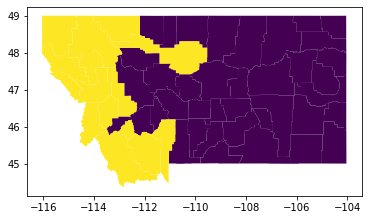

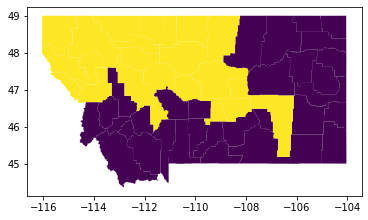

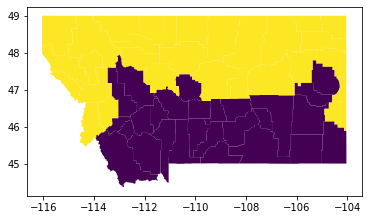

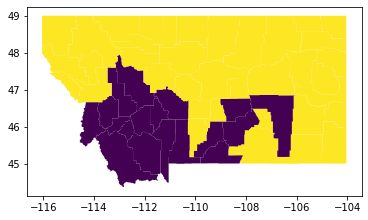

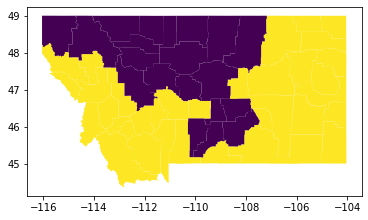

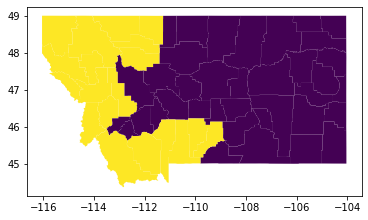

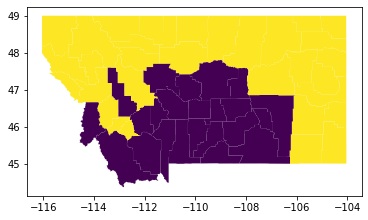

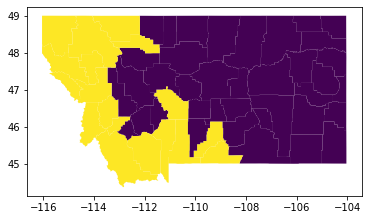

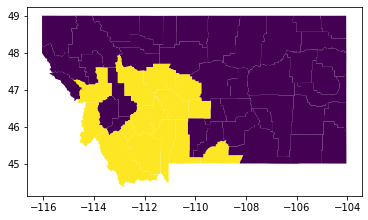

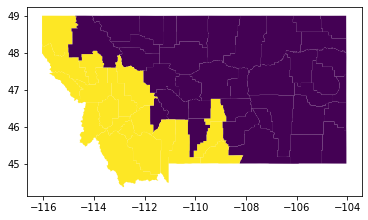

In [7]:
# Draw the districting plans
from cluster import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top 10 clusters are:")
for p in range(len(districts)):
    draw_single_district( filepath, filename, G, districts[p], zoom=False )